In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
import sys

# Redirect standard output to a variable
original_stdout = sys.stdout
sys.stdout = open(os.devnull, 'w')

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Restore the original standard output
sys.stdout = original_stdout

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")


In [3]:
!pip install spacy
!python -m spacy download en


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [4]:
import spacy
nlp = spacy.load('en_core_web_sm')


# Load and Read the dataset

In [5]:
import os
import json
import pandas as pd

In [6]:
root_directory = "/kaggle/input/math-dataset/MATH/train"

In [7]:
problems = []
levels = []
types = []


In [8]:
for subdir, _, files in os.walk(root_directory):
    for file in files:
        if file.endswith(".json"):
            file_path = os.path.join(subdir, file)
            with open(file_path, "r") as json_file:
                data = json.load(json_file)
                problems.append(data["problem"])
                levels.append(data["level"])
                types.append(data["type"])


In [9]:
data_dict = {
    "problem": problems,
    "level": levels,
    "type": types
}

df = pd.DataFrame(data_dict)


In [10]:
df.head()

,problem,level,type
0,The United States Postal Service charges an ex...,Level 3,Prealgebra
1,How many integers between 1000 and 2000 have a...,Level 4,Prealgebra
2,"Given that $n$ is an integer and $0 < 4n <30$,...",Level 2,Prealgebra
3,How many integers between $100$ and $150$ have...,Level 4,Prealgebra
4,Regular pentagon $ABCDE$ and regular hexagon $...,Level 4,Prealgebra


In [11]:
df['Difficulty_level'] = df['level'].replace({
    'Level 1': 1,
    'Level 2': 2,
    'Level 3': 3,
    'Level 4': 4,
    'Level 5': 5
})


In [12]:
df['Difficulty_level'].value_counts()

5          2304
4          1690
3          1592
2          1348
1           564
Level ?       2
Name: Difficulty_level, dtype: int64

In [13]:
#Removing the 2 values without Level encoding
df = df[df['Difficulty_level'] != 'Level ?']

In [14]:
df['Difficulty_level'].value_counts()

5    2304
4    1690
3    1592
2    1348
1     564
Name: Difficulty_level, dtype: int64

In [15]:
df['type'].value_counts()

Algebra                   1744
Intermediate Algebra      1295
Prealgebra                1205
Number Theory              869
Geometry                   868
Counting & Probability     771
Precalculus                746
Name: type, dtype: int64

In [16]:
df['problem'] = df['problem'].str.lower()


In [17]:
#Seeing the the count of Algebra problems
count_algebra = (df['type'].str.contains('algebra', case=False)).sum()
count_algebra

4244

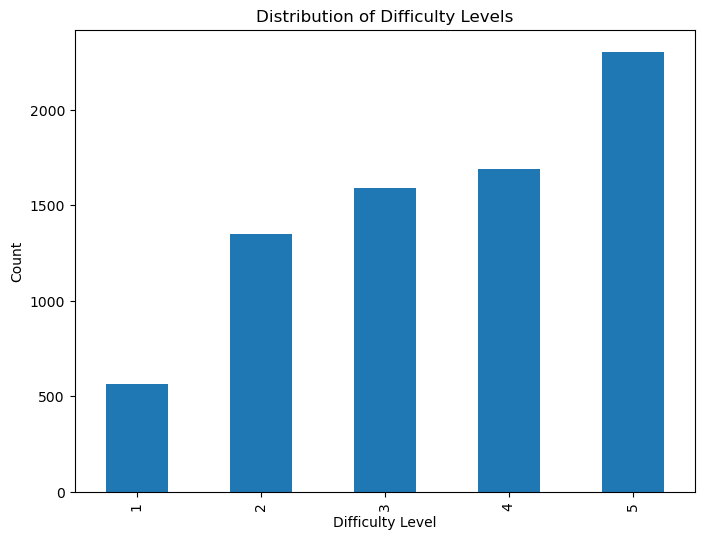

In [18]:
import matplotlib.pyplot as plt

# Group the data by 'Difficulty_level' and count the occurrences of each level
difficulty_counts = df['Difficulty_level'].value_counts().loc[[1, 2, 3, 4, 5]]

# Create a bar plot
plt.figure(figsize=(8, 6))
difficulty_counts.plot(kind='bar')
plt.title('Distribution of Difficulty Levels')
plt.xlabel('Difficulty Level')
plt.ylabel('Count')

# Show the plot
plt.show()


In [19]:
#Adding ID column to Dataframe
import pandas as pd

df.insert(0, 'ID', range(1, len(df) + 1))

# Display the updated DataFrame
print(df)


        ID                                            problem    level  \
0        1  the united states postal service charges an ex...  Level 3   
1        2  how many integers between 1000 and 2000 have a...  Level 4   
2        3  given that $n$ is an integer and $0 < 4n <30$,...  Level 2   
3        4  how many integers between $100$ and $150$ have...  Level 4   
4        5  regular pentagon $abcde$ and regular hexagon $...  Level 4   
...    ...                                                ...      ...   
7495  7494  let $z$ be a complex number with $|z| = \sqrt{...  Level 5   
7496  7495  let $a$ and $b$ be real numbers.  find the max...  Level 4   
7497  7496  in the complex plane, $z,$ $z^2,$ $z^3$ form, ...  Level 5   
7498  7497  there is a smallest positive real number $a$ s...  Level 5   
7499  7498  a function $f$ has domain $[0,2]$ and range $[...  Level 3   

                      type Difficulty_level  
0               Prealgebra                3  
1               Pre

In [20]:
import pandas as pd

# Filter rows where 'type' is 'algebra'
algebra_df = df[df['type'].str.contains('algebra', case=False)]
print(algebra_df.shape)
# Export the filtered DataFrame to a new CSV file
algebra_df.to_csv('algebra_problems_v1.csv', index=False)


(4244, 5)


In [21]:
algebra_df.dtypes

ID                   int64
problem             object
level               object
type                object
Difficulty_level    object
dtype: object

In [22]:
specific_problem_value = algebra_df["problem"].iloc[150]
specific_problem_value

'lines $l$ and $m$ are parallel to each other. $m\\angle a = 120^\\circ$, and $m\\angle b = 150^\\circ$. what is the number of degrees in $m\\angle c$?\n\n[asy]\nsize(100); real h = 1.2; currentpen = fontsize(10pt);\ndraw(label("$l$",relative(1)),(0,0)--(1,0),e);\ndraw(label("$m$",relative(1)),(0,-h)--(1,-h),e);\ndraw((0,-h)--h/2*(cos(150*pi/180),sin(150*pi/180)) + (0,-h));\ndraw(label("$c$",relative(1)),(0,0)--h*sqrt(3)/2*(cos(-120*pi/180),sin(-120*pi/180)),w);\nlabel("$a$",(0,0),n); label("$b$",(0,-h),s);\nlabel("$120^\\circ$",(0,0),se); label("$150^\\circ$",(0,-h),ne);\n[/asy]'

# **Working with Algebra Problems**

In [23]:
import pandas as pd
import nltk
from nltk.corpus import stopwords


# Function to remove stop words and lowercase text
def preprocess_text(text):
    # Tokenize the text into words
    words = nltk.word_tokenize(text)
    
    # Remove stop words and convert to lowercase
    stop_words = set(stopwords.words('english'))
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
    
    # Join the filtered words back into a string
    processed_text = ' '.join(filtered_words)
    
    return processed_text

# Apply the preprocessing function to the specified column
algebra_df['problem'] = algebra_df['problem'].apply(preprocess_text)

# Display the updated DataFrame with processed text
print(algebra_df.head())


   ID                                            problem    level        type  \
0   1  united states postal service charges extra $ \...  Level 3  Prealgebra   
1   2  many integers 1000 2000 three numbers 15 , 20 ...  Level 4  Prealgebra   
2   3  given $ n $ integer $ 0 < 4n < 30 $ , sum poss...  Level 2  Prealgebra   
3   4  many integers $ 100 $ $ 150 $ three different ...  Level 4  Prealgebra   
4   5  regular pentagon $ abcde $ regular hexagon $ a...  Level 4  Prealgebra   

  Difficulty_level  
0                3  
1                4  
2                2  
3                4  
4                4  


In [24]:
# Function to lemmatize text using SpaCy
def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_words = [token.lemma_ for token in doc]
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text

# Apply the lemmatization function to the specified column
algebra_df['problem'] = algebra_df['problem'].apply(lemmatize_text)

# Display the updated DataFrame with lemmatized text
print(algebra_df.head())


   ID                                            problem    level        type  \
0   1  united states postal service charge extra $ \ ...  Level 3  Prealgebra   
1   2  many integer 1000 2000 three number 15 , 20 25...  Level 4  Prealgebra   
2   3  give $ n $ integer $ 0 < 4n < 30 $ , sum possi...  Level 2  Prealgebra   
3   4  many integer $ 100 $ $ 150 $ three different d...  Level 4  Prealgebra   
4   5  regular pentagon $ abcde $ regular hexagon $ a...  Level 4  Prealgebra   

  Difficulty_level  
0                3  
1                4  
2                2  
3                4  
4                4  


In [25]:
# replace few known latex symbols
import pandas as pd

# Replace \left, \right, \qqaud, [\asy], [asy], \times, \emph, \mbox{ cm}, and {\mathrm{th}} with the desired values
algebra_df['problem'] = algebra_df['problem'].str.replace(r'\\left', '', regex=True)
algebra_df['problem'] = algebra_df['problem'].str.replace(r'\\right', '', regex=True)
algebra_df['problem'] = algebra_df['problem'].str.replace(r'\\qqaud', '', regex=True)
algebra_df['problem'] = algebra_df['problem'].str.replace(r'\[asy\]', '', regex=True)
algebra_df['problem'] = algebra_df['problem'].str.replace(r'\[asy\]', '', regex=True)
algebra_df['problem'] = algebra_df['problem'].str.replace(r'\\times', '*', regex=True)
algebra_df['problem'] = algebra_df['problem'].str.replace(r'\\emph', '', regex=True)
algebra_df['problem'] = algebra_df['problem'].str.replace(r'\\mbox{ (.*?)}', r'\1', regex=True)
algebra_df['problem'] = algebra_df['problem'].str.replace(r'\\{(.*?)\\}\\^{\\mathrm{th}}', r'\1^th', regex=True)
algebra_df['problem'] = algebra_df['problem'].str.replace(r'\$\$\s+', r'$$', regex=True)
algebra_df['problem'] = algebra_df['problem'].str.replace(r'\s+\$\$', r'$$', regex=True)

# Display the updated DataFrame
print(algebra_df)


        ID                                            problem    level  \
0        1  united states postal service charge extra $ \ ...  Level 3   
1        2  many integer 1000 2000 three number 15 , 20 25...  Level 4   
2        3  give $ n $ integer $ 0 < 4n < 30 $ , sum possi...  Level 2   
3        4  many integer $ 100 $ $ 150 $ three different d...  Level 4   
4        5  regular pentagon $ abcde $ regular hexagon $ a...  Level 4   
...    ...                                                ...      ...   
7495  7494  let $ z $ complex number $ |z| = \sqrt { 2 } ....  Level 5   
7496  7495  let $ $ $ b $ real number . find maximum value...  Level 4   
7497  7496  complex plane , $ z , $ $ z^2 , $ $ z^3 $ form...  Level 5   
7498  7497  small positive real number $ $ exist positive ...  Level 5   
7499  7498  function $ f $ domain $ [ 0,2 ] $ range $ [ 0,...  Level 3   

                      type Difficulty_level  
0               Prealgebra                3  
1               Pre

In [26]:
# Find rows with blank values in the 'problem' column
blank_rows = algebra_df[algebra_df['problem'].str.strip() == '']

# Get the number of rows with blank values
blank_count = len(blank_rows)

# Display the row numbers of rows with blank values
if blank_count > 0:
    blank_row_numbers = blank_rows.index
    print(f"Number of Rows with Blank Values: {blank_count}")
    print(f"Row Numbers with Blank Values: {list(blank_row_numbers)}")
else:
    print("No Rows with Blank Values")


No Rows with Blank Values


# **Extracting Features**

In [27]:
import pandas as pd
import re

# Initialize an empty list to store dictionaries with extracted attributes
question_attributes = []

# Define regex patterns for matching
number_pattern = r'(?:(?<=\D)|^)(\d+(?:\.\d+)?)(?:(?=\D)|$)'
equation_pattern = r'(>=|<=|=)'
math_symbol_pattern = r'[+*/^<>]+|-(?![\-])|\\angle|\\circ|\dot|\\cdot|\\sqrt'
variable_pattern = r'\b[a-zA-Z]{3,}\b'

# Iterate through questions and extract attributes
for index, row in algebra_df.iterrows():
    question = row['problem']
    difficulty_level = row['Difficulty_level']  # Assuming this is the column name
    ID = row['ID']  # Assuming 'algebra_df' has an 'ID' column

    question_dict = {}  # Create a dictionary to store attributes for this question

    # Extract numbers and their lengths
    number_matches = re.findall(number_pattern, question)
    question_dict['Numbers'] = number_matches

    # Extract equations and their count
    equation_matches = re.findall(equation_pattern, question)
    question_dict['Math_Equations'] = equation_matches
    question_dict['Equation_Count'] = len(equation_matches)

    # Extract math symbols
    math_symbol_matches = re.findall(math_symbol_pattern, question)
    question_dict['Math_Symbols'] = math_symbol_matches

    # Extract and store unique variables
    variable_matches = re.findall(variable_pattern, question)
    unique_variables = list(set(variable_matches))  # Convert to a list to maintain order
    question_dict['Variables'] = unique_variables

    # Store the question, its attributes, and difficulty level in the dictionary
    question_dict['ID'] = ID
    question_dict['Question'] = question
    question_dict['Difficulty_level'] = difficulty_level

    question_attributes.append(question_dict)

# Convert the list of dictionaries into a DataFrame
ExtractedFeatures = pd.DataFrame(question_attributes)

# Display the DataFrame
print(ExtractedFeatures)


                                                Numbers Math_Equations  \
0       [0.11, 1.3, 2.5, 0.11, 6, 4, 9, 3, 6, 6, 11, 4]             []   
1                              [1000, 2000, 15, 20, 25]             []   
2                                            [0, 4, 30]             []   
3                                       [100, 150, 129]             []   
4     [0, 2.5, 0, 7.5, 4, 10, 8, 7.5, 8, 2.5, 4, 0, ...             []   
...                                                 ...            ...   
4239                                       [2, 1, 2, 1]            [=]   
4240                                                 []             []   
4241                                             [2, 3]             []   
4242                                             [3, 2]             []   
4243                                 [0, 2, 0, 1, 1, 1]            [=]   

      Equation_Count                                       Math_Symbols  \
0                  0                

In [28]:
ExtractedFeatures['variable_count'] = ExtractedFeatures['Variables'].apply(len)


In [29]:
ExtractedFeatures.dtypes

Numbers             object
Math_Equations      object
Equation_Count       int64
Math_Symbols        object
Variables           object
ID                   int64
Question            object
Difficulty_level     int64
variable_count       int64
dtype: object

In [30]:
#Deleting question Column
# Drop the 'Question' column from df1
ExtractedFeatures.drop(columns=['Question'], inplace=True)

In [31]:
ExtractedFeatures.head()

,Numbers,Math_Equations,Equation_Count,Math_Symbols,Variables,ID,Difficulty_level,variable_count
0,"[0.11, 1.3, 2.5, 0.11, 6, 4, 9, 3, 6, 6, 11, 4]",[],0,[],"[states, length, envelope, great, charge, hlin...",1,3,24
1,"[1000, 2000, 15, 20, 25]",[],0,[],"[integer, many, three, number, factor]",2,4,5
2,"[0, 4, 30]",[],0,"[<, <]","[give, integer, sum, value, possible]",3,2,5
3,"[100, 150, 129]",[],0,[],"[increase, digit, integer, many, three, order,...",4,4,8
4,"[0, 2.5, 0, 7.5, 4, 10, 8, 7.5, 8, 2.5, 4, 0, ...",[],0,"[-, -, -, -, -, -, -, -, -, -, -, -, -, -, -, ...","[coplanar, line, cycle, segment, opposite, hex...",5,4,21


**Load the Algebra Vocabulary file**

In [32]:
import pandas as pd

file_path = "/kaggle/input/algebra-vocab/AlgebraVocab.csv"

# Load the CSV file into a DataFrame
Algebra_Vocab = pd.read_csv(file_path)


In [33]:
Algebra_Vocab.head()

,MATH VOCAB
0,system of equations
1,inequality
2,expression
3,factorization
4,algebraic


In [34]:
import pandas as pd

# Create a set of math vocabulary words from the loaded CSV file
math_vocab_set = set(Algebra_Vocab['MATH VOCAB'])

# Function to find math vocabulary in a given text
def find_math_vocab(text):
    # Split the text into words and convert to lowercase for case-insensitive matching
    words = text.split()
    math_vocab_found = [word for word in words if word.lower() in math_vocab_set]
    return math_vocab_found

# Create the 'MATH VOCABulary' column in 'algebra_df'
algebra_df['MATH Vocabulary'] = algebra_df['problem'].apply(find_math_vocab)

# Display the modified DataFrame
print(algebra_df)


        ID                                            problem    level  \
0        1  united states postal service charge extra $ \ ...  Level 3   
1        2  many integer 1000 2000 three number 15 , 20 25...  Level 4   
2        3  give $ n $ integer $ 0 < 4n < 30 $ , sum possi...  Level 2   
3        4  many integer $ 100 $ $ 150 $ three different d...  Level 4   
4        5  regular pentagon $ abcde $ regular hexagon $ a...  Level 4   
...    ...                                                ...      ...   
7495  7494  let $ z $ complex number $ |z| = \sqrt { 2 } ....  Level 5   
7496  7495  let $ $ $ b $ real number . find maximum value...  Level 4   
7497  7496  complex plane , $ z , $ $ z^2 , $ $ z^3 $ form...  Level 5   
7498  7497  small positive real number $ $ exist positive ...  Level 5   
7499  7498  function $ f $ domain $ [ 0,2 ] $ range $ [ 0,...  Level 3   

                      type Difficulty_level  \
0               Prealgebra                3   
1               P

In [35]:
# Merge 'MATH Vocabulary' from algebra_df based on 'ID'
ExtractedFeatures = ExtractedFeatures.merge(algebra_df[['ID', 'MATH Vocabulary']], on='ID', how='left')

# Display the modified DataFrame
print(ExtractedFeatures.head())


                                             Numbers Math_Equations  \
0    [0.11, 1.3, 2.5, 0.11, 6, 4, 9, 3, 6, 6, 11, 4]             []   
1                           [1000, 2000, 15, 20, 25]             []   
2                                         [0, 4, 30]             []   
3                                    [100, 150, 129]             []   
4  [0, 2.5, 0, 7.5, 4, 10, 8, 7.5, 8, 2.5, 4, 0, ...             []   

   Equation_Count                                       Math_Symbols  \
0               0                                                 []   
1               0                                                 []   
2               0                                             [<, <]   
3               0                                                 []   
4               0  [-, -, -, -, -, -, -, -, -, -, -, -, -, -, -, ...   

                                           Variables  ID  Difficulty_level  \
0  [states, length, envelope, great, charge, hlin...   1      

In [36]:
ExtractedFeatures.dtypes

Numbers             object
Math_Equations      object
Equation_Count       int64
Math_Symbols        object
Variables           object
ID                   int64
Difficulty_level     int64
variable_count       int64
MATH Vocabulary     object
dtype: object

> ****Identifying If question has Table or Diagram****

In [37]:
# Define keywords for Tabular and Diagram questions
tabular_keywords = ['table', 'tabular']
diagram_keywords = ['draw', 'plot', 'graph','label']
# Create "Tabular Question" column
ExtractedFeatures['Tabular Question'] = ExtractedFeatures['Variables'].apply(lambda x: 'Yes' if any(keyword in x for keyword in tabular_keywords) else 'No')

# Create "Diagram" column
ExtractedFeatures['Diagram'] = ExtractedFeatures['Variables'].apply(lambda x: 'Yes' if any(keyword in x for keyword in diagram_keywords) else 'No')

# Display the updated DataFrame
print(ExtractedFeatures.head())


                                             Numbers Math_Equations  \
0    [0.11, 1.3, 2.5, 0.11, 6, 4, 9, 3, 6, 6, 11, 4]             []   
1                           [1000, 2000, 15, 20, 25]             []   
2                                         [0, 4, 30]             []   
3                                    [100, 150, 129]             []   
4  [0, 2.5, 0, 7.5, 4, 10, 8, 7.5, 8, 2.5, 4, 0, ...             []   

   Equation_Count                                       Math_Symbols  \
0               0                                                 []   
1               0                                                 []   
2               0                                             [<, <]   
3               0                                                 []   
4               0  [-, -, -, -, -, -, -, -, -, -, -, -, -, -, -, ...   

                                           Variables  ID  Difficulty_level  \
0  [states, length, envelope, great, charge, hlin...   1      

In [38]:
print("Value counts for Tabular Question:\n",ExtractedFeatures['Tabular Question'].value_counts())

Value counts for Tabular Question:
 No     4216
Yes      28
Name: Tabular Question, dtype: int64


In [39]:
print("Value counts for Diagram:\n",ExtractedFeatures['Diagram'].value_counts())

Value counts for Diagram:
 No     3858
Yes     386
Name: Diagram, dtype: int64


***Plotting Variable count column to see the IQR ranges***

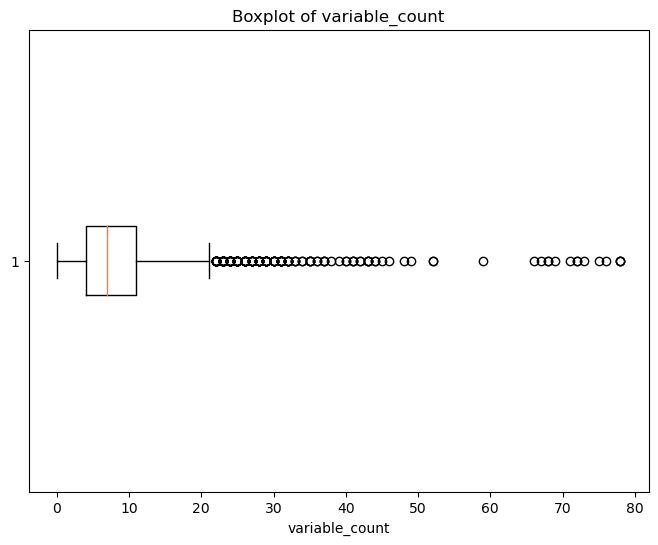

Q1: 4.0
Median (Q2): 7.0
Q3: 11.0
IQR: 7.0
Minimum Value: 0
Maximum Value: 78
80th Percentile Value: 12.0
85th Percentile Value: 14.0
90th Percentile Value: 16.0


In [40]:
import matplotlib.pyplot as plt

# Create a boxplot of the 'variable_count' column
plt.figure(figsize=(8, 6))
plt.boxplot(ExtractedFeatures['variable_count'], vert=False)

# Add labels and title
plt.xlabel('variable_count')
plt.title('Boxplot of variable_count')

# Show the plot
plt.show()

# Calculate quartiles Q1, Q2 (median), Q3, IQR, min, and max values
q1 = ExtractedFeatures['variable_count'].quantile(0.25)
q2 = ExtractedFeatures['variable_count'].median()
q3 = ExtractedFeatures['variable_count'].quantile(0.75)
iqr = q3 - q1
min_value = ExtractedFeatures['variable_count'].min()
max_value = ExtractedFeatures['variable_count'].max()

print(f'Q1: {q1}')
print(f'Median (Q2): {q2}')
print(f'Q3: {q3}')
print(f'IQR: {iqr}')
print(f'Minimum Value: {min_value}')
print(f'Maximum Value: {max_value}')
# Calculate the value at the 80th percentile
percentile_80 = ExtractedFeatures['variable_count'].quantile(0.8)
percentile_85 = ExtractedFeatures['variable_count'].quantile(0.85)
percentile_90 = ExtractedFeatures['variable_count'].quantile(0.9)
print(f'80th Percentile Value: {percentile_80}')
print(f'85th Percentile Value: {percentile_85}')
print(f'90th Percentile Value: {percentile_90}')


***Visualizing the Frequency of values in Variable count column***

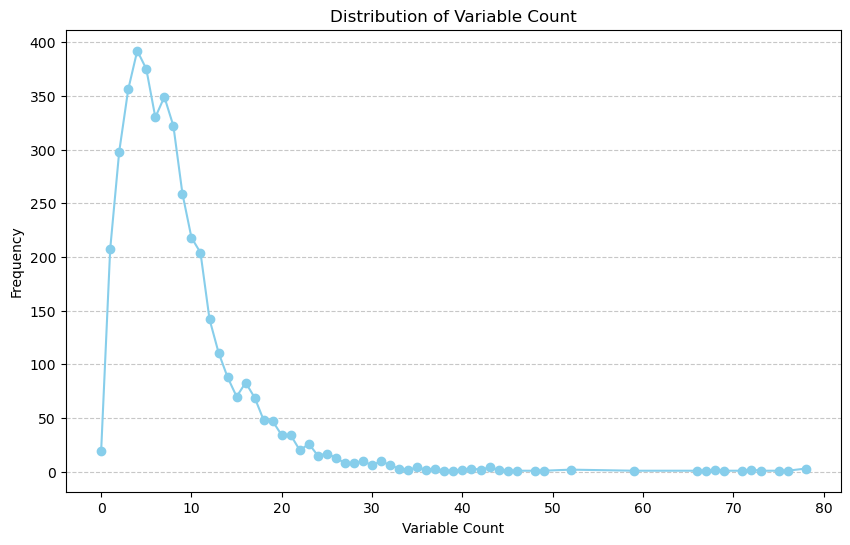

In [41]:
import matplotlib.pyplot as plt

# Assuming 'variable count' is the name of the column in ExtractedFeatures
variable_count = ExtractedFeatures['variable_count']

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(variable_count.value_counts().sort_index(), marker='o', linestyle='-', color='skyblue')
plt.title('Distribution of Variable Count')
plt.xlabel('Variable Count')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


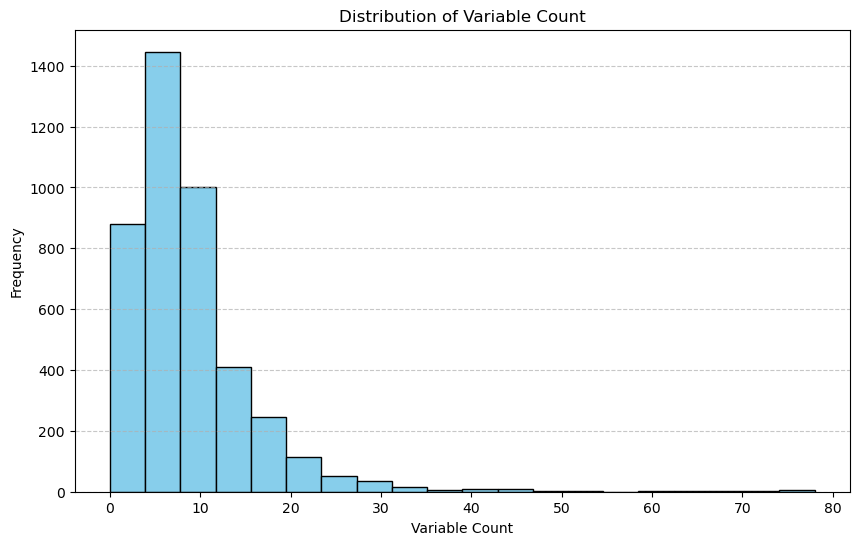

In [42]:
import matplotlib.pyplot as plt

# Assuming 'variable count' is the name of the column in ExtractedFeatures
variable_count = ExtractedFeatures['variable_count']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(variable_count, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Variable Count')
plt.xlabel('Variable Count')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


***Fetching only rows which has variable count lesser than 25 words***

In [43]:
# Filter rows where 'variable count' is less than or equal to 25
Final_Extracted_Features = ExtractedFeatures[ExtractedFeatures['variable_count'] <= 25]
Final_Extracted_Features.head()

,Numbers,Math_Equations,Equation_Count,Math_Symbols,Variables,ID,Difficulty_level,variable_count,MATH Vocabulary,Tabular Question,Diagram
0,"[0.11, 1.3, 2.5, 0.11, 6, 4, 9, 3, 6, 6, 11, 4]",[],0,[],"[states, length, envelope, great, charge, hlin...",1,3,24,"[divide, height, less, four, tabular, height, ...",Yes,No
1,"[1000, 2000, 15, 20, 25]",[],0,[],"[integer, many, three, number, factor]",2,4,5,"[integer, three, number, factor]",No,No
2,"[0, 4, 30]",[],0,"[<, <]","[give, integer, sum, value, possible]",3,2,5,"[integer, sum, integer, value]",No,No
3,"[100, 150, 129]",[],0,[],"[increase, digit, integer, many, three, order,...",4,4,8,"[integer, three, digit, order, one, integer]",No,No
4,"[0, 2.5, 0, 7.5, 4, 10, 8, 7.5, 8, 2.5, 4, 0, ...",[],0,"[-, -, -, -, -, -, -, -, -, -, -, -, -, -, -, ...","[coplanar, line, cycle, segment, opposite, hex...",5,4,21,"[pentagon, hexagon, draw, opposite, line, segm...",No,Yes


In [44]:
Final_Extracted_Features.shape

(4133, 11)

In [45]:
Final_Extracted_Features.dtypes

Numbers             object
Math_Equations      object
Equation_Count       int64
Math_Symbols        object
Variables           object
ID                   int64
Difficulty_level     int64
variable_count       int64
MATH Vocabulary     object
Tabular Question    object
Diagram             object
dtype: object

***Checking the skewness of the Target column- Difficulty level***

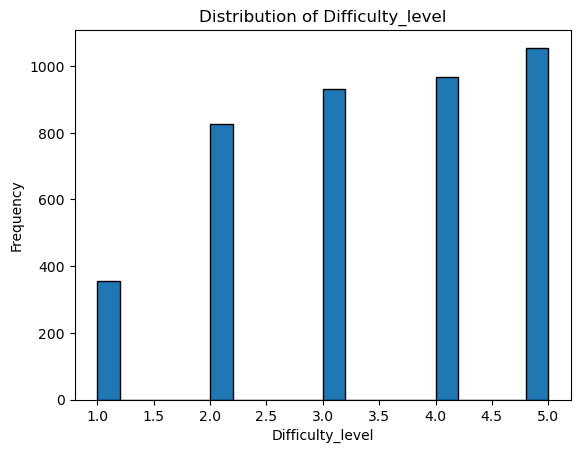

Skewness of Difficulty_level: -0.24284912923503288


In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Final_Extracted_Features' is your DataFrame
target_column = 'Difficulty_level'

# Check skewness
skewness = Final_Extracted_Features[target_column].skew()

# Create a histogram to visualize the distribution
plt.hist(Final_Extracted_Features[target_column], bins=20, edgecolor='k')
plt.title(f'Distribution of {target_column}')
plt.xlabel(target_column)
plt.ylabel('Frequency')
plt.show()

# Output the skewness value
print(f'Skewness of {target_column}: {skewness}')


> A skewness value of approximately -0.243 for the 'Difficulty Level' indicates a slight negative skewness in the distribution of difficulty levels in your dataset. This means that the majority of data points are slightly concentrated on the higher end of the difficulty scale, and there are relatively fewer data points on the lower end of the scale.

In [47]:
Final_Extracted_Features.head()

,Numbers,Math_Equations,Equation_Count,Math_Symbols,Variables,ID,Difficulty_level,variable_count,MATH Vocabulary,Tabular Question,Diagram
0,"[0.11, 1.3, 2.5, 0.11, 6, 4, 9, 3, 6, 6, 11, 4]",[],0,[],"[states, length, envelope, great, charge, hlin...",1,3,24,"[divide, height, less, four, tabular, height, ...",Yes,No
1,"[1000, 2000, 15, 20, 25]",[],0,[],"[integer, many, three, number, factor]",2,4,5,"[integer, three, number, factor]",No,No
2,"[0, 4, 30]",[],0,"[<, <]","[give, integer, sum, value, possible]",3,2,5,"[integer, sum, integer, value]",No,No
3,"[100, 150, 129]",[],0,[],"[increase, digit, integer, many, three, order,...",4,4,8,"[integer, three, digit, order, one, integer]",No,No
4,"[0, 2.5, 0, 7.5, 4, 10, 8, 7.5, 8, 2.5, 4, 0, ...",[],0,"[-, -, -, -, -, -, -, -, -, -, -, -, -, -, -, ...","[coplanar, line, cycle, segment, opposite, hex...",5,4,21,"[pentagon, hexagon, draw, opposite, line, segm...",No,Yes


In [48]:
# Create a new column 'Math_Symbols_Count' in the 'Final_Extracted_Features' DataFrame
Final_Extracted_Features['Math_Symbols_Count'] = Final_Extracted_Features['Math_Symbols'].apply(lambda x: len(x))


In [49]:
#Deleting question Column
# Drop the 'Question' column from final dataframe
Final_Extracted_Features.drop(columns=['Math_Equations','Math_Symbols','Variables',], inplace=True)

In [50]:
Final_Extracted_Features.head()

,Numbers,Equation_Count,ID,Difficulty_level,variable_count,MATH Vocabulary,Tabular Question,Diagram,Math_Symbols_Count
0,"[0.11, 1.3, 2.5, 0.11, 6, 4, 9, 3, 6, 6, 11, 4]",0,1,3,24,"[divide, height, less, four, tabular, height, ...",Yes,No,0
1,"[1000, 2000, 15, 20, 25]",0,2,4,5,"[integer, three, number, factor]",No,No,0
2,"[0, 4, 30]",0,3,2,5,"[integer, sum, integer, value]",No,No,2
3,"[100, 150, 129]",0,4,4,8,"[integer, three, digit, order, one, integer]",No,No,0
4,"[0, 2.5, 0, 7.5, 4, 10, 8, 7.5, 8, 2.5, 4, 0, ...",0,5,4,21,"[pentagon, hexagon, draw, opposite, line, segm...",No,Yes,20


***Feature Engineering with NUMBER Column***

In [51]:
# Define a function to count and remove decimal numbers
def count_and_remove_decimal_numbers(numbers_list):
    decimal_count = sum(1 for num in numbers_list if '.' in str(num))
    # Remove decimal numbers from the list
    numbers_list = [num for num in numbers_list if '.' not in str(num)]
    return decimal_count, numbers_list

# Apply the function to create a new column and remove decimal numbers
Final_Extracted_Features[['Decimal_Num_Count', 'Numbers']] = Final_Extracted_Features['Numbers'].apply(count_and_remove_decimal_numbers).apply(pd.Series)

# Display the modified DataFrame
print(Final_Extracted_Features)


                                                Numbers  Equation_Count    ID  \
0                             [6, 4, 9, 3, 6, 6, 11, 4]               0     1   
1                              [1000, 2000, 15, 20, 25]               0     2   
2                                            [0, 4, 30]               0     3   
3                                       [100, 150, 129]               0     4   
4     [0, 0, 4, 10, 8, 8, 4, 0, 1, 8, 1, 9, 5, 5, 4,...               0     5   
...                                                 ...             ...   ...   
4239                                       [2, 1, 2, 1]               1  7494   
4240                                                 []               0  7495   
4241                                             [2, 3]               0  7496   
4242                                             [3, 2]               0  7497   
4243                                 [0, 2, 0, 1, 1, 1]               1  7498   

      Difficulty_level  var

In [52]:
# Define functions to count occurrences
def count_single_digit(numbers_list):
    return sum(1 for num in numbers_list if 0 <= int(num) <= 9)

def count_double_digit(numbers_list):
    return sum(1 for num in numbers_list if 10 <= int(num) <= 99)

def count_triple_or_more(numbers_list):
    return sum(1 for num in numbers_list if int(num) >= 100)

# Apply the functions to create new columns
Final_Extracted_Features['Single_digit_number_count'] = Final_Extracted_Features['Numbers'].apply(count_single_digit)
Final_Extracted_Features['Double_digit_count'] = Final_Extracted_Features['Numbers'].apply(count_double_digit)
Final_Extracted_Features['Triple_digit_count'] = Final_Extracted_Features['Numbers'].apply(count_triple_or_more)

# Display the modified DataFrame
print(Final_Extracted_Features)


                                                Numbers  Equation_Count    ID  \
0                             [6, 4, 9, 3, 6, 6, 11, 4]               0     1   
1                              [1000, 2000, 15, 20, 25]               0     2   
2                                            [0, 4, 30]               0     3   
3                                       [100, 150, 129]               0     4   
4     [0, 0, 4, 10, 8, 8, 4, 0, 1, 8, 1, 9, 5, 5, 4,...               0     5   
...                                                 ...             ...   ...   
4239                                       [2, 1, 2, 1]               1  7494   
4240                                                 []               0  7495   
4241                                             [2, 3]               0  7496   
4242                                             [3, 2]               0  7497   
4243                                 [0, 2, 0, 1, 1, 1]               1  7498   

      Difficulty_level  var

In [53]:
Final_Extracted_Features.columns

Index(['Numbers', 'Equation_Count', 'ID', 'Difficulty_level', 'variable_count',
       'MATH Vocabulary', 'Tabular Question', 'Diagram', 'Math_Symbols_Count',
       'Decimal_Num_Count', 'Single_digit_number_count', 'Double_digit_count',
       'Triple_digit_count'],
      dtype='object')

In [54]:
Word_Data = Final_Extracted_Features[['ID', 'MATH Vocabulary']]

print(Word_Data.head())


   ID                                    MATH Vocabulary
0   1  [divide, height, less, four, tabular, height, ...
1   2                   [integer, three, number, factor]
2   3                     [integer, sum, integer, value]
3   4       [integer, three, digit, order, one, integer]
4   5  [pentagon, hexagon, draw, opposite, line, segm...


In [55]:
Final_Extracted_Features.drop(columns=['Numbers'], inplace=True)

In [56]:
Final_Extracted_Features.head()

,Equation_Count,ID,Difficulty_level,variable_count,MATH Vocabulary,Tabular Question,Diagram,Math_Symbols_Count,Decimal_Num_Count,Single_digit_number_count,Double_digit_count,Triple_digit_count
0,0,1,3,24,"[divide, height, less, four, tabular, height, ...",Yes,No,0,4,7,1,0
1,0,2,4,5,"[integer, three, number, factor]",No,No,0,0,0,3,2
2,0,3,2,5,"[integer, sum, integer, value]",No,No,2,0,2,1,0
3,0,4,4,8,"[integer, three, digit, order, one, integer]",No,No,0,0,0,0,3
4,0,5,4,21,"[pentagon, hexagon, draw, opposite, line, segm...",No,Yes,20,19,38,3,0


In [57]:
Final_Extracted_Features.to_csv('Final_Extracted_Features_V1.csv', index=False)

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encode 'Difficulty_level' using LabelEncoder
label_encoder = LabelEncoder()
Final_Extracted_Features['Difficulty_level_encoded'] = label_encoder.fit_transform(Final_Extracted_Features['Difficulty_level'])

# Encoding binary columns
Final_Extracted_Features['Tabular Question'] = Final_Extracted_Features['Tabular Question'].map({'Yes': 1, 'No': 0})
Final_Extracted_Features['Diagram'] = Final_Extracted_Features['Diagram'].map({'Yes': 1, 'No': 0})



In [59]:
# Flatten the 'MATH Vocabulary' lists to a single string
Word_Data['MATH Vocabulary'] = Word_Data['MATH Vocabulary'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

# Preprocess "MATH Vocabulary" using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
vocabulary_tfidf = tfidf_vectorizer.fit_transform(Word_Data['MATH Vocabulary'])
tfidfframe = pd.DataFrame(vocabulary_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Include 'ID' column in the tfidfframe
tfidfframe['ID'] = Word_Data['ID']

# Display the modified 'tfidfframe' DataFrame
print(tfidfframe.head())


   abc  abcd  abcdef  ace  addition  adjacent  algebra  altitude     angle  \
0  0.0   0.0     0.0  0.0       0.0       0.0      0.0       0.0  0.000000   
1  0.0   0.0     0.0  0.0       0.0       0.0      0.0       0.0  0.000000   
2  0.0   0.0     0.0  0.0       0.0       0.0      0.0       0.0  0.000000   
3  0.0   0.0     0.0  0.0       0.0       0.0      0.0       0.0  0.000000   
4  0.0   0.0     0.0  0.0       0.0       0.0      0.0       0.0  0.072316   

   area  ...  vertex  vertical  vertically  weigh  weight  whole  width  \
0   0.0  ...     0.0       0.0         0.0    0.0     0.0    0.0    0.0   
1   0.0  ...     0.0       0.0         0.0    0.0     0.0    0.0    0.0   
2   0.0  ...     0.0       0.0         0.0    0.0     0.0    0.0    0.0   
3   0.0  ...     0.0       0.0         0.0    0.0     0.0    0.0    0.0   
4   0.0  ...     0.0       0.0         0.0    0.0     0.0    0.0    0.0   

   zeros  zeta   ID  
0    0.0   0.0  1.0  
1    0.0   0.0  2.0  
2    0.0   0.0

In [60]:
tfidfframe['ID'].fillna(-1, inplace=True)
tfidfframe['ID'] = tfidfframe['ID'].astype(int)


In [61]:

# Merge the dataframes on the 'ID' column
merged_dataframe = Final_Extracted_Features.merge(tfidfframe, on='ID', how='inner')  # Use 'how' as 'inner' to retain only matching rows

# Display the merged dataframe
print(merged_dataframe)

      Equation_Count    ID  Difficulty_level  variable_count  \
0                  0     1                 3              24   
1                  0     2                 4               5   
2                  0     3                 2               5   
3                  0     4                 4               8   
4                  0     5                 4              21   
...              ...   ...               ...             ...   
4018               1  7383                 5               4   
4019               2  7384                 3              13   
4020               2  7385                 2               9   
4021               3  7386                 3               4   
4022               1  7387                 5               7   

                                        MATH Vocabulary  Tabular Question  \
0     [divide, height, less, four, tabular, height, ...                 1   
1                      [integer, three, number, factor]                 0   


In [62]:
y = merged_dataframe['Difficulty_level_encoded']

In [63]:
columns_to_drop = ['ID', 'Difficulty_level', 'MATH Vocabulary', 'Difficulty_level_encoded']
merged_dataframe.drop(columns=columns_to_drop, inplace=True)


In [64]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(merged_dataframe, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
# Build SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.28695652173913044


***Next steps:***
1. Identify the Expressions in a questions and there Count
2. Troubleshoot further on Low accuracy
3. Feature Engineering